# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [101]:
# scraping for dynamic web pages
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# requests for static web pages only
import requests
import time

# parsing
from bs4 import BeautifulSoup

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
my_service = Service(executable_path=ChromeDriverManager().install())
browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [103]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [104]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [105]:
# Extract all rows of data
tables = soup.find_all("table", {"class": "table"})
len(tables)

1

In [106]:
table = tables[0]
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [111]:
dfs = pd.read_html(str(table))
easy_df = dfs[0]
easy_df.head()

C:\Users\redra\AppData\Local\Temp\ipykernel_25684\595405285.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(table))


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [108]:
# Test row
data_row = table.find("tr", {"class": "data-row"}).text.strip()
print(data)

2
2012-08-16
10
155
6
-75.0
739.0


In [112]:
# Create an empty list
rows = []
all_data = table.find_all("tr", {"class": "data-row"})

# Loop through the scraped data to create a list of rows
for row in all_data:

    data = table.find("tr", {"class": "data-row"}).text.strip()

    table_data  = row.find_all('td')
    row = [col.text for col in table_data]
    
    rows.append(row)

In [113]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
comp_df = pd.DataFrame(rows, columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])
comp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [114]:
# Confirm DataFrame was created successfully
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [116]:
comp_df.terrestrial_date = pd.to_datetime(comp_df.terrestrial_date)
comp_df.sol = comp_df.sol.astype('int')
comp_df.ls = comp_df.ls.astype('int')
comp_df.month = comp_df.month.astype('int')
comp_df.min_temp = comp_df.min_temp.astype('float')
comp_df.pressure = comp_df.pressure.astype('float')

In [117]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.3+ KB


In [118]:
# Examine data type of each column
easy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [119]:
# Change data types for data analysis
easy_df["terrestrial_date"] = pd.to_datetime(easy_df.terrestrial_date)

In [120]:
# Confirm type changes were successful by examining data types again
easy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [121]:
# 1. How many months are there on Mars?
easy_df.month.value_counts().sort_index()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [122]:
# 2. How many Martian days' worth of data are there?
easy_df.sol.nunique()

1867

In [123]:
# 3. What is the average low temperature by month?
avg_min_temp = easy_df.groupby("month")["min_temp"].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

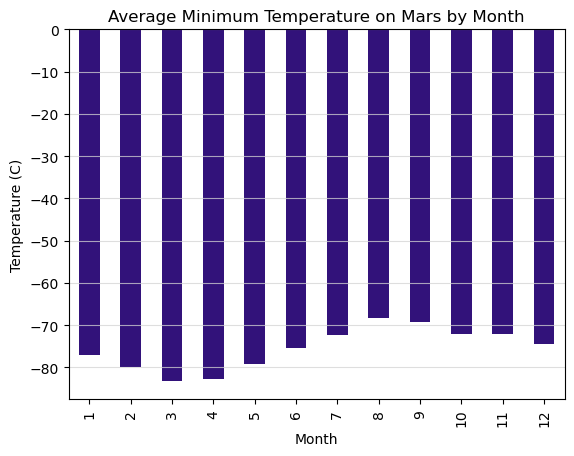

In [140]:
# Plot the average temperature by month
avg_min_temp.plot(kind="bar", color="#32127A")
plt.grid(axis="y", color="lightgrey", alpha=0.75)
plt.ylabel("Temperature (C)")
plt.xlabel("Month")
plt.title("Average Minimum Temperature on Mars by Month")
plt.show()

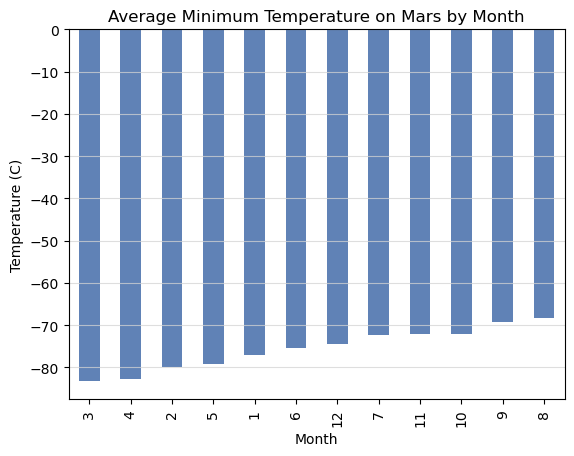

In [141]:
# Identify the coldest and hottest months in Curiosity's location
avg_min_temp_2 = avg_min_temp.sort_values()
avg_min_temp_2.plot(kind="bar", color="#6082B6")
plt.grid(axis="y", color="lightgrey", alpha=0.75)
plt.ylabel("Temperature (C)")
plt.xlabel("Month")
plt.title("Average Minimum Temperature on Mars by Month")
plt.show()

In [126]:
# 4. Average pressure by Martian month
avg_pressure = easy_df.groupby("month")["pressure"].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

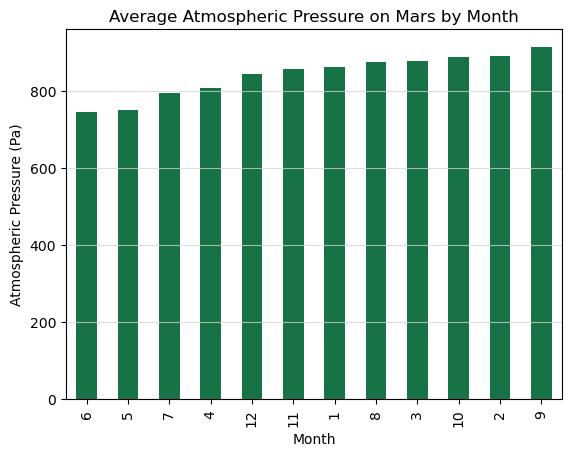

In [139]:
# Plot the average pressure by month
avg_pressure_sorted = avg_pressure.sort_values()
avg_pressure_sorted.plot(kind="bar", color="#177245")
plt.grid(axis="y", color="lightgrey", alpha=0.75)
plt.ylabel("Atmospheric Pressure (Pa)")
plt.xlabel("Month")
plt.title("Average Atmospheric Pressure on Mars by Month")
plt.show()

In [143]:
# 5. How many terrestrial (earth) days are there in a Martian year?

terr_days = range(1, len(easy_df) +1)
terr_days

range(1, 1868)

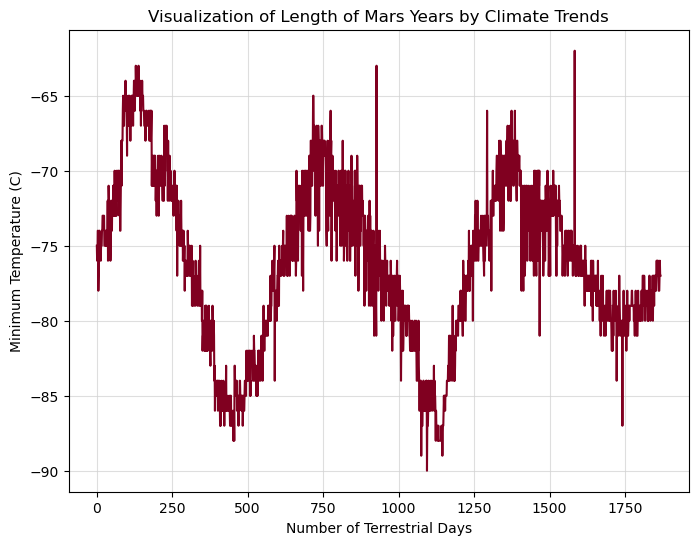

In [145]:
plt.figure(figsize=(8,6))
plt.plot(terr_days, easy_df.min_temp, color="#800020")
plt.grid(axis="y", color="lightgrey", alpha=0.75)
plt.grid(axis="x", color="lightgrey", alpha=0.75)
plt.ylabel("Minimum Temperature (C)")
plt.xlabel("Number of Terrestrial Days")
plt.title("Visualization of Length of Mars Years by Climate Trends")
plt.show()

### Conclusions

Average minimum temperatures on Mars are the coldest in the 3rd and 4th months and highest in the 8th and 9th months, with all of these readings between -65C and -85C.

Average atmospheric pressure on Mars is lowest in the 5th and 6th months and highest in the 9th month, with all measurements between 700 and 1000 Pa. Atmospheric pressure may be positively correlated with temperature.

By looking at this line graph, we can estimate that one year on Mars is about 675 Earth days long, as calculated by the valleys at 1125 and 450 days. Nasa confirms that one year on Mars is 687 Earth days (https://spaceplace.nasa.gov/years-on-other-planets/en/).

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [146]:
# Write the data to a CSV
easy_df.to_csv("Mars_climate_data.csv", index=False, header=True)

In [147]:
browser.quit()